Could not load dataset, computing features
Processing folder old:


100%|██████████| 10000/10000 [00:37<00:00, 264.86it/s]

Processing folder young:



100%|██████████| 10000/10000 [00:38<00:00, 259.06it/s]

Could not load filtered dataset, computing filters
Could not load activations, computing activations



100%|██████████| 7143/7143 [00:33<00:00, 210.93it/s]

Could not load points, computing points



100%|██████████| 7143/7143 [00:29<00:00, 239.47it/s]


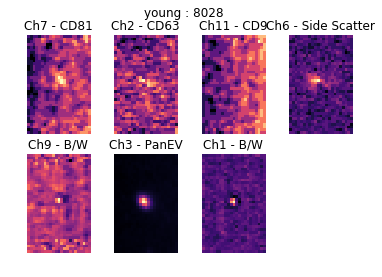

('Number of ch1 maxima: ', 1.0)
('Number of ch6 maxima: ', 1.0)
('Distance from edge: ', 460.0)
('Circularity Ch1: ', 0.10279406072355415)
('Circularity Ch6: ', 0.090646527351430278)


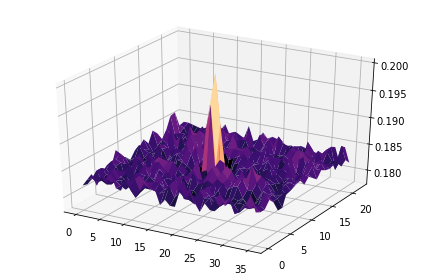

In [6]:
%reload_ext autoreload
% autoreload 2
from BioAnalysis import BioAnalysis
from BioImage import BioImage

analysis = BioAnalysis()

b = analysis.showRandomFilteredImage()
b.show3D(b.ch1)

In [7]:
analysis.getContingencyMatrix()

('Number of Young samples:', 3491)
('Number of Old Samples:', 3652)


,Young,Old
CD63+,3466.0,3608.0
CD63-,25.0,44.0


('p-value:', 0.039352785652233518)


,Young,Old
CD81+,1316.0,1416.0
CD81-,2175.0,2236.0


('p-value:', 0.35481172537058647)


,Young,Old
CD9+,256.0,402.0
CD9-,3235.0,3250.0


('p-value:', 7.6657506877506022e-08)


{'Old': {'Mean': array([   2.80377553,    5.50043339,    6.07537562,  411.95071194,
          365.79600219,  378.21851041]),
  'Var': array([  1.68264430e+01,   8.14354296e+00,   9.36770260e+00,
           7.93455074e+04,   4.55859198e+04,   4.53256773e+04])},
 'Young': {'Mean': array([   2.81854469,    5.92764924,    5.91651941,  305.38155256,
          377.29132054,  381.07247207]),
  'Var': array([  2.33601992e+01,   8.91679796e+00,   6.99262795e+00,
           6.49620738e+04,   3.78180701e+04,   3.38519269e+04])}}

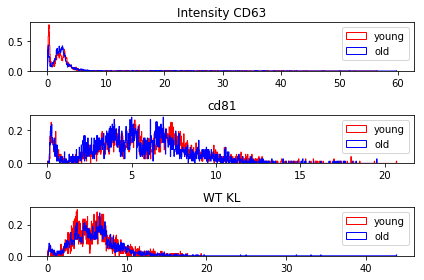

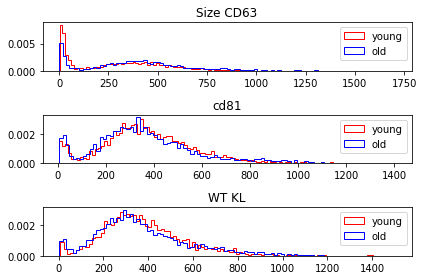

In [8]:
analysis.getTotalIntensityDistribution()

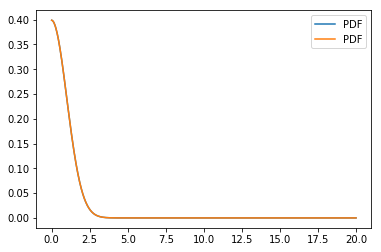

In [31]:
points_young = analysis.points_young
points_old = analysis.points_old
import numpy as np

# Compute a histogram of the sample
bins = np.linspace(0, 20, 1000)
histogram_young, bins_young = np.histogram(points_young[:,2], bins=bins, normed=True)
histogram_old, bins_old = np.histogram(points_old[:,2], bins=bins, normed=True)

bin_centers_young = 0.5*(bins_young[1:] + bins_young[:-1])
bin_centers_old = 0.5*(bins_old[1:] + bins_old[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf_young = stats.norm.pdf(bin_centers_young)
pdf_old = stats.norm.pdf(bin_centers_old)
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
# plt.plot(bin_centers_young, histogram_young, label="Histogram of samples")
# plt.plot(bin_centers_old, histogram_old, label="Histogram of samples")
plt.plot(bin_centers_young, pdf_young, label="PDF")
plt.plot(bin_centers_old, pdf_old, label="PDF")
plt.legend()
plt.show()

In [9]:
points_young = analysis.points_young
points_old = analysis.points_old

from scipy.stats import mannwhitneyu
for i in range(0,6):
    young = points_young[:,i]
    old = points_old[:,i]
    print(mannwhitneyu(young, old)[1])


1.067397534e-07
4.3746925708e-12
0.0437684950384
1.05206858764e-53
3.6262659473e-06
0.00126367783382
